<a href="https://colab.research.google.com/github/Yamin1999/Assembly-code/blob/master/Malaria_Cell_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
#mount the dataset folder from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#re-sizing the images
IMAGE_SIZE = [200, 200]

train_path = '/content/drive/MyDrive/Colab Notebooks/Dataset.rar (Unzipped Files)/Dataset/Train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Dataset.rar (Unzipped Files)/Dataset/Test'

In [ ]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/Dataset/Train/Parasite/C133P94ThinF_IMG_20151004_155721_cell_111.png',target_size=(224,224))

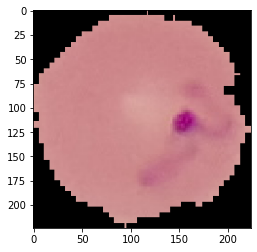

In [ ]:
# Parasitic Image
plt.imshow(img)

In [ ]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/Dataset/Train/Uninfected/C1_thinF_IMG_20150604_104722_cell_115.png',target_size=(224,224))

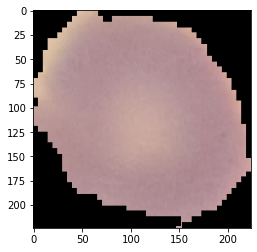

In [ ]:
# Uninfected Image
plt.imshow(img)

In [ ]:
# Import the Vgg 19 library and add preprocessing layer to the front of VGG


vgg19 =  VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
## Not training the existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
#getting number of output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/Dataset.rar (Unzipped Files)/Dataset/Train/*')

In [ ]:
folders

['/content/drive/MyDrive/Colab Notebooks/Dataset.rar (Unzipped Files)/Dataset/Train/Parasite',
 '/content/drive/MyDrive/Colab Notebooks/Dataset.rar (Unzipped Files)/Dataset/Train/Uninfected']

In [ ]:
#flatten the vgg19 layers
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# creating a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:
#structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
#loss, optimizer and metrics
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Using the Image Data Generator to import the images from the dataset
# And Augmented the image dataset 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (200, 200),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 20838 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (200, 200),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 6493 images belonging to 2 classes.


In [ ]:
#fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
326/326 [==============================] - 3698s 11s/step - loss: 0.4036 - accuracy: 0.8206 - val_loss: 0.4532 - val_accuracy: 0.7921
Epoch 2/50
326/326 [==============================] - 389s 1s/step - loss: 0.2741 - accuracy: 0.8876 - val_loss: 0.4588 - val_accuracy: 0.8129
Epoch 3/50
326/326 [==============================] - 385s 1s/step - loss: 0.2477 - accuracy: 0.9021 - val_loss: 0.2711 - val_accuracy: 0.8900
Epoch 4/50
326/326 [==============================] - 392s 1s/step - loss: 0.2339 - accuracy: 0.9069 - val_loss: 0.3275 - val_accuracy: 0.8720
Epoch 5/50
326/326 [==============================] - 399s 1s/step - loss: 0.2272 - accuracy: 0.9115 - val_loss: 0.6001 - val_accuracy: 0.7990
Epoch 6/50
326/326 [==============================] - 411s 1s/step - loss: 0.2523 - accuracy: 0.9016 - val_loss: 0.1684 - val_accuracy: 0.9435
Epoch 7/50
326/326 [==============================] - 402s 1s/step - loss: 0.2192 - accuracy: 0.9141 - val_loss: 0.1876 - val_accuracy: 0.93

In [ ]:
# ploting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# ploting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# saving the model as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
#thus we used dence layer as 2 nodes so we got y_pred with two values
#sum of the two values = 1
# 0 = Uninfacted image 
# 1 = Parasaitic image
y_pred

array([[2.16306210e-01, 7.83693790e-01],
       [7.49029756e-01, 2.50970274e-01],
       [1.51557788e-01, 8.48442256e-01],
       [9.79209781e-01, 2.07902249e-02],
       [3.98223370e-01, 6.01776600e-01],
       [6.90742075e-01, 3.09257925e-01],
       [4.21065718e-01, 5.78934252e-01],
       [9.98023152e-01, 1.97684998e-03],
       [5.34885764e-01, 4.65114266e-01],
       [9.96370435e-01, 3.62962694e-03],
       [6.91781223e-01, 3.08218837e-01],
       [3.31629694e-01, 6.68370366e-01],
       [9.76097465e-01, 2.39024963e-02],
       [9.87245798e-01, 1.27541674e-02],
       [9.98382449e-01, 1.61754608e-03],
       [5.81379235e-01, 4.18620735e-01],
       [5.35004497e-01, 4.64995503e-01],
       [8.11081350e-01, 1.88918695e-01],
       [9.96073246e-01, 3.92681127e-03],
       [9.98581886e-01, 1.41809590e-03],
       [3.39980811e-01, 6.60019219e-01],
       [5.37042677e-01, 4.62957323e-01],
       [2.08485261e-01, 7.91514754e-01],
       [4.09182429e-01, 5.90817511e-01],
       [9.873397

In [ ]:
#argmax helps to get maximum no of index value
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# 0 = person is not infected
# 1 = person is uninfected
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
#loading the newly created model
model=load_model('model_vgg19.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/Dataset/Test/Uninfected/2.png',target_size=(224,224))

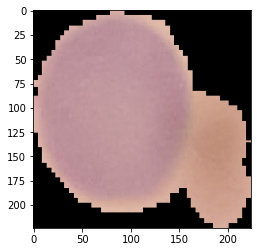

In [ ]:
#displaying the test iamge
plt.imshow(img)

In [ ]:
#convert the image is an array
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
#shape of the image
x.shape

(224, 224, 3)

In [ ]:
#In test data set we rescale the image deviding by 255 so do it here also
x=x/255

In [ ]:
#expand the dimension and 
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
#predict the test Image
model.predict(img_data)

array([[0.00401553, 0.99598444]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
#result

if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
